In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Matrix Multiplication

##### (i) Check if matrix multiplication is valid

In [16]:
def isValid(A,B):
  return True if (A.shape[1]==B.shape[0]) else False

##### (ii) Using loops (without using numpy)

In [17]:
def matrix_multiply(A,B):
  C= np.zeros((A.shape[0],B.shape[1]))
  for i in range(0, A.shape[0]):
    for k in range(0, A.shape[1]):
      x=0
      for j in range(0, A.shape[1]):
        x+=(A[i,j]*B[j,k])
      C[i,k]=x
  return C


##### (iii) Using numpy

In [18]:
def matrix_multiply_2(A,B):
  return A.dot(B)

#####(iv) Testing code


In [19]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

B = np.array([
    [13, 14, 15],
    [16, 17, 18],
    [19, 20, 21]
])

if isValid(A,B):
  print(f"Result using loops: {matrix_multiply(A,B)}")
  print(f"Result using numpy: {matrix_multiply_2(A,B)}")
else:
  print(f"Matrix multiplication is not valid")

Result using loops: [[102. 108. 114.]
 [246. 261. 276.]
 [390. 414. 438.]
 [534. 567. 600.]]
Result using numpy: [[102 108 114]
 [246 261 276]
 [390 414 438]
 [534 567 600]]


### Z-Score Normalisation

##### (i) Without using numpy

In [20]:
def mean(x):
  return sum(x)/len(x)

In [21]:
def standard_deviation(x):
  m = mean(x)
  std=0
  for i in range(0,len(x)):
    std = (x[i]-m)**2
  std= (std/(len(x)-1))**0.5
  return std

In [22]:
def zscore_normalisation(x):
  m= mean(x)
  C= []
  std = standard_deviation(x)
  for i in range(0,len(x)):
    C.append((x[i]-m)/std)
  return C


##### (ii) Using numpy

In [23]:
def zscore_normalisation_2(x):
  mean_value = np.mean(x)
  std_value = np.std(x)
  normalized_x = (x - mean_value) / std_value
  return normalized_x

##### (iii) Testing code

In [24]:
x = [4, 7, 7, 15, 32, 47, 63, 89, 102, 131]
print(f"Result without using numpy: {zscore_normalisation(x)}")
print(f"Result using numpy: {zscore_normalisation_2(x)}")

Result without using numpy: [-1.686346863468635, -1.5756457564575648, -1.5756457564575648, -1.2804428044280445, -0.6531365313653138, -0.09963099630996321, 0.49077490774907745, 1.4501845018450186, 1.929889298892989, 3.0]
Result using numpy: [-1.06753267 -0.99745394 -0.99745394 -0.81057732 -0.41346451 -0.06307086
  0.31068237  0.91803138  1.22170588  1.89913361]


### Sigmoid fn and its derivative

##### (i) Write a fn to implement sigmoid fn

In [25]:
def sigmoidfn(x):
  return 1 / (1 + np.exp(-x))
  #your code here

##### (ii) Write a fn to implement derivative of sigmoid fn

In [26]:
def derivative(x):
  return -sigmoidfn(x)*(1-sigmoidfn(x))
  #your code here

##### (iii) Testing code

In [27]:
x = np.array([
    [9,2,5,0,0],
    [7,5,0,0,0]
])
print(f"x on applying sigmoid activation fn is: {sigmoidfn(x)}")
print(f"x on applying derivative of sigmoid activation fn is: {derivative(x)}")

x on applying sigmoid activation fn is: [[0.99987661 0.88079708 0.99330715 0.5        0.5       ]
 [0.99908895 0.99330715 0.5        0.5        0.5       ]]
x on applying derivative of sigmoid activation fn is: [[-1.23379350e-04 -1.04993585e-01 -6.64805667e-03 -2.50000000e-01
  -2.50000000e-01]
 [-9.10221180e-04 -6.64805667e-03 -2.50000000e-01 -2.50000000e-01
  -2.50000000e-01]]


#Playing with Pandas

###Read the csv file


In [28]:
df= pd.read_csv('superheated_vapor_properties.csv')

###Display the shape of data frame


In [29]:
df.shape

(544, 37)

###Return an array containing names of all the columns

In [30]:
df.columns.values

array(['Pressure', 'Property', 'Liq_Sat', 'Vap_Sat', '75', '100', '125',
       '150', '175', '200', '220', '225', '240', '250', '260', '275',
       '280', '290', '300', '320', '325', '340', '350', '360', '375',
       '380', '400', '425', '450', '475', '500', '525', '550', '575',
       '600', '625', '650'], dtype=object)

###Display the number of null values in each column of the dataframe``



In [31]:
df.isnull().sum()

Pressure      0
Property      0
Liq_Sat       0
Vap_Sat       0
75          528
100         508
125         488
150         448
175         384
200         320
220         408
225         400
240         408
250         344
260         384
275         340
280         380
290         488
300          60
320         480
325         136
340         476
350          68
360         476
375         204
380         476
400           0
425         204
450           0
475         204
500           0
525         272
550           0
575         340
600           0
625         476
650           0
dtype: int64

###Create a column which contains the Pressure and Property columns, seperated with 'at' (For eg. V at 1, H at 101.325). Using this print the following:
- Enthalpy at 75 kPa and 573 K
- Entropy at 493 K and 250 kPa



In [32]:
df['Combined'] =df['Property'] + ' at ' + df['Pressure'].astype(str)
D1= df[df['Combined'] == 'H at 75.0']
D2= df[df['Combined'] == 'S at 250.0']
print("Enthalpy at 75 kPa and 573 K: ",D1['300'])
print("Entropy at 493 K and 250 kPa: ",D2['220'])

Enthalpy at 75 kPa and 573 K:  26    3075.1
Name: 300, dtype: float64
Entropy at 493 K and 250 kPa:  59   NaN
Name: 220, dtype: float64


###Find out the column with the highest number of missing values

In [33]:
df.isnull().sum().idxmax()

'75'

###What is the average enthalpy of Sat. Liq. at all different pressures in the dataset ?

In [34]:
df2=df.loc[df['Property']=='H']
df2['Liq_Sat'].mean()

936.9707720588235

###Separate out the V,U,H,S data from the dataset into V_data, U_data, H_data, S_data

In [35]:
V_data = df[df['Property'] == 'V']
U_data = df[df['Property'] == 'U']
H_data = df[df['Property'] == 'H']
S_data = df[df['Property'] == 'S']

#PLotting the PLOTS

###Plot the properties (specific volume, specific internal energy, specific enthalpy, specific entropy) vs Pressure for saturated liquid.


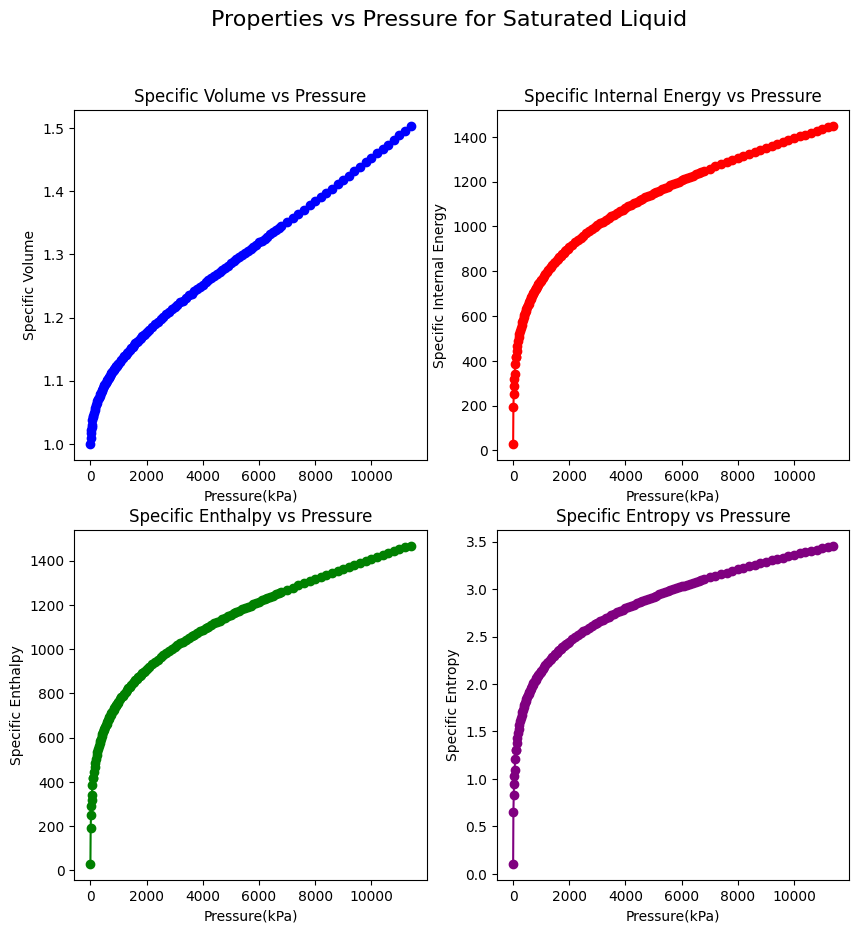

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.suptitle('Properties vs Pressure for Saturated Liquid', fontsize=16)

axes[0, 0].plot(V_data['Pressure'], V_data['Liq_Sat'], marker='o', linestyle='-', color='b')
axes[0, 0].set_title('Specific Volume vs Pressure')
axes[0, 0].set_xlabel('Pressure(kPa)')
axes[0, 0].set_ylabel('Specific Volume')

axes[0, 1].plot(U_data['Pressure'], U_data['Liq_Sat'], marker='o', linestyle='-', color='r')
axes[0, 1].set_title('Specific Internal Energy vs Pressure')
axes[0, 1].set_xlabel('Pressure(kPa)')
axes[0, 1].set_ylabel('Specific Internal Energy')

axes[1, 0].plot(H_data['Pressure'], H_data['Liq_Sat'], marker='o', linestyle='-', color='g')
axes[1, 0].set_title('Specific Enthalpy vs Pressure')
axes[1, 0].set_xlabel('Pressure(kPa)')
axes[1, 0].set_ylabel('Specific Enthalpy')

axes[1, 1].plot(S_data['Pressure'], S_data['Liq_Sat'], marker='o', linestyle='-', color='purple')
axes[1, 1].set_title('Specific Entropy vs Pressure')
axes[1, 1].set_xlabel('Pressure(kPa)')
axes[1, 1].set_ylabel('Specific Entropy')

plt.show()

###Plot the specific volume of saturated liquid between 300 kPa and 1500 kPa

Text(0.5, 0, 'Specific Volume')

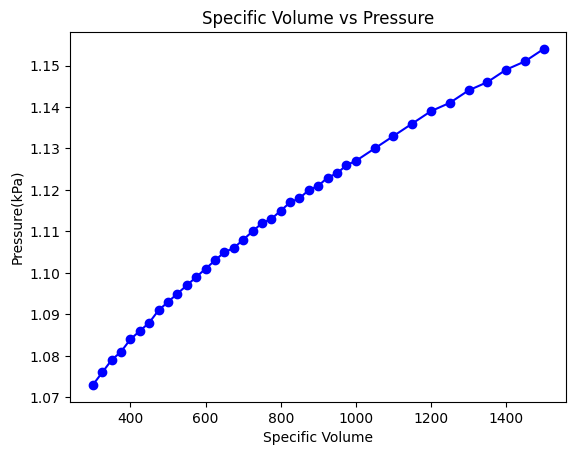

In [37]:
V_data_range = V_data[(V_data['Pressure']>=300) & (V_data['Pressure']<=1500)]
plt.plot(V_data_range['Pressure'], V_data_range['Liq_Sat'], marker='o', linestyle='-', color='b')
plt.title('Specific Volume vs Pressure')
plt.ylabel('Pressure(kPa)')
plt.xlabel('Specific Volume')

#Linear Regression


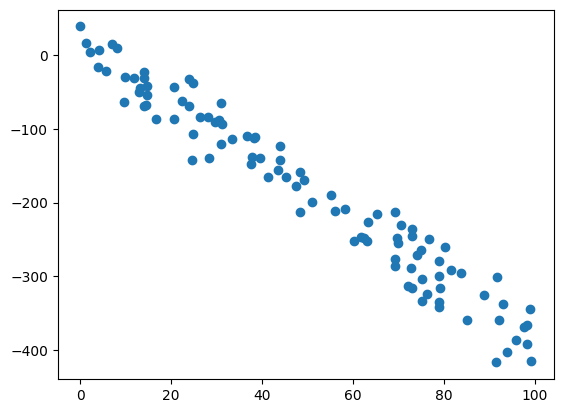

In [38]:
 # Generation of data points
x = np.random.rand(100)*100
y = -4*x+15
y = y+np.random.randn(100)*30
plt.scatter(x,y)

In [39]:
m, c = -3, 12

#Cost function to be minimised
def cost_fn(m,c,x,y):
  y_o = m*x+c
  loss = np.sum(np.square(y_o-y))#Squared error
  return loss/(np.shape(x)[0])

#Function for updating parameter
def update_params(m,c,learning_rate,x,y):
  y_o = m*x+c
  n = float(len(x))
  Dm = -2*np.sum(x*(y-y_o))/n
  Dc = -2*np.sum(y-y_o)/n
  m = m - learning_rate*Dm
  c = c - learning_rate*Dc

  return m,c

Run the model

In [40]:
epochs = 100000
learning_rate =  0.0002
for i in range(epochs):
  loss=cost_fn(m,c,x,y)
  m,c=update_params(m,c,learning_rate,x,y)

In [41]:
print(m,c)  # value should be close to (-4,15)

-4.024531740768936 17.36232717834124
